Importing necessary libraries

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

<ipython-input-2-5fca9fd0a714>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Part 1: Labs

## Lab 1: Points dataset with stochastic gradient descent (SGD)

In [240]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

y = np.array([-1,-1,1,1,1])

For simplicity's sake we fold the bias term $b$ into the data set:

In [241]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

Lets plot the dataset to see if it is linearly seperable (hard-margin SVM):

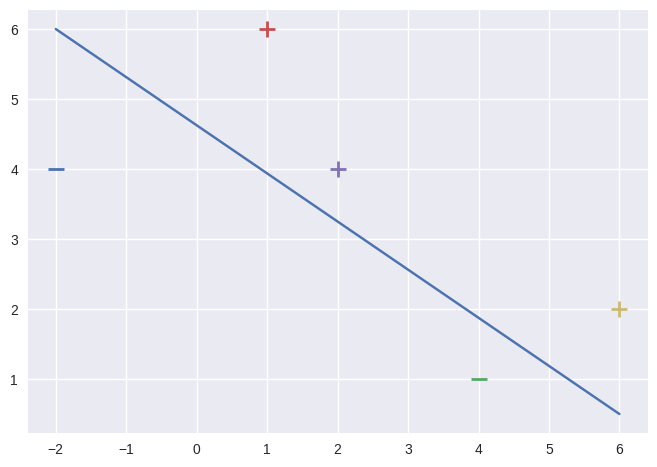

In [242]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2,6],[6,0.5])

We used a regularizer $\lambda$ in the algorithm. As we have a small data set, which is easily lineary seperable, this is actually not needed and the stochastic gradient descent algorithm would probably converge faster without it.

To keep it simple, we linearly loop over the sample set. For larger data sets it would makes sense to randomly pick a sample during each iteration in the for-loop.

We will run the sgd one million times. Our learning parameter $\eta$ is set to $1$. As a regularizing parameter we choose $1/t$, so this parameter will decrease as the number of epochs increases.

We print the number of misclassified and correctly classified samples.

In [243]:
import numpy as np
import matplotlib.pyplot as plt

def svm_sgd(X, Y, eta=1, epochs=1000):
    w = np.zeros(len(X[0]))
    errors = []

    for epoch in range(epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i] * np.dot(X[i], w)) < 1:
                w = w + eta * ((X[i] * Y[i]) + (-2 * (1 / (epoch + 1)) * w))
                error = 1
            else:
                w = w + eta * (-2 * (1 / (epoch + 1)) * w)
        errors.append(error)

    return w

def svm_sgd_plot(X, Y, eta=1, epochs=1000):
    w = np.zeros(len(X[0]))
    errors = []

    for epoch in range(epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i] * np.dot(X[i], w)) < 1:
                w = w + eta * ((X[i] * Y[i]) + (-2 * (1 / (epoch + 1)) * w))
                error = 1
            else:
                w = w + eta * (-2 * (1 / (epoch + 1)) * w)
        errors.append(error)

    plt.plot(errors, '|')
    plt.ylim(0.5, 1.5)
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()

In [246]:
w = svm_sgd(X, y)
print(w)
# svm_sgd_plot(X, y)

[1.19648651 2.16854441 8.16420921]


In [ ]:
def svm_sgd_plot2(X, Y):

    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    errors = []


    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error += 1
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)

    plt.plot(errors)
    plt.show()

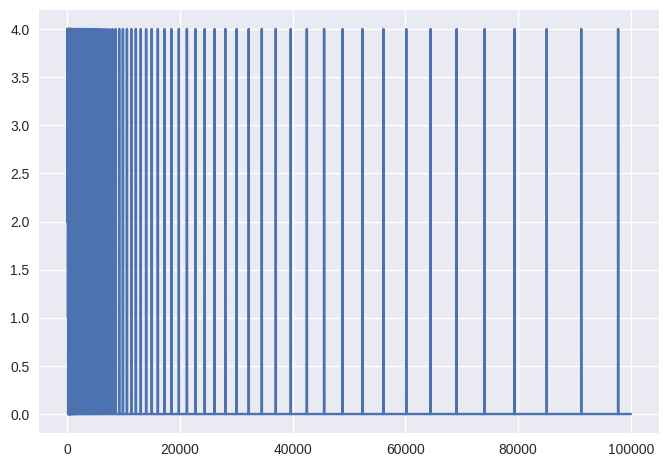

In [ ]:
svm_sgd_plot2(X,y)

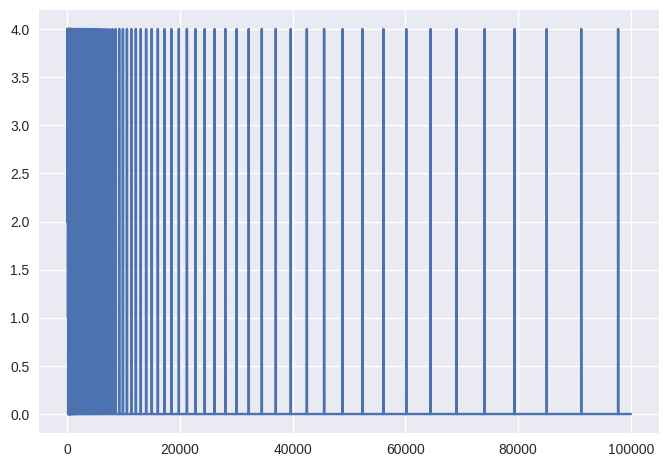

In [ ]:
svm_sgd_plot2(X,y)

The graphs show that the svm makes less and less misclassifications the more epochs it runs. When we make errors, we always misclassify 4.

The svm updates its weight vector by the regularizer even if the current samples is correctly classified. So we do not reach zero errors.

This is actually a strengh of the SVM as it always tries to maximize the margin between the two classes: Our SVM in contrast always tries to optimize the hyperplane by maximizing the distance between the two classes.

1.5887611677029299


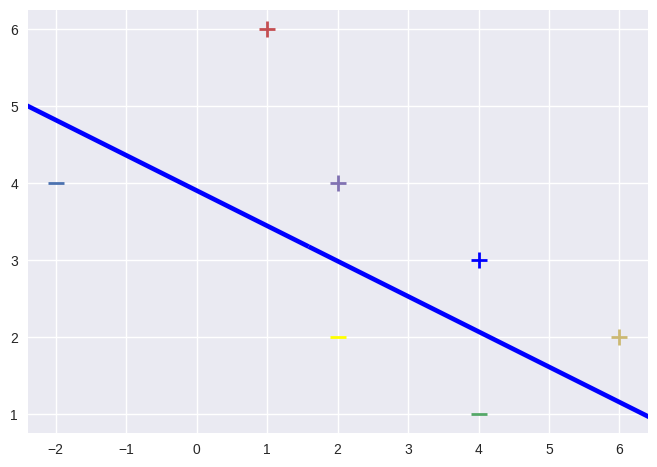

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
print(w[0])
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

# Lab 2: CIFAR with stochastic gradient descent (SGD)


In [ ]:
import pickle
import numpy as np
import os
#from scipy.misc import imread
from matplotlib.pyplot import imread

#def load_CIFAR_batch(filename):
#    """ load single batch of cifar """
#    with open(filename, 'rb') as f:
#        datadict = pickle.load(f)
#        X = datadict['data']
#        Y = datadict['labels']
#        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
#        Y = np.array(Y)
#        return X, Y
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    datadict = unpickle(filename)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [ ]:
cifar10_dir = '/content/cigar-10-batches-py'
db1 = unpickle('/content/cigar-10-batches-py/data_batch_1')
db1.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [ ]:
for k in db1.keys():
    print(len(db1[k]))

21
10000
10000
10000


In [ ]:
db1['data'].shape

(10000, 3072)

In [ ]:
3 * 32 * 32

3072

In [ ]:
X1 = db1['data'][123].reshape(3, 32, 32).transpose(1,2,0).astype("float")

In [ ]:
X1b = np.flip(X1, (0,1))

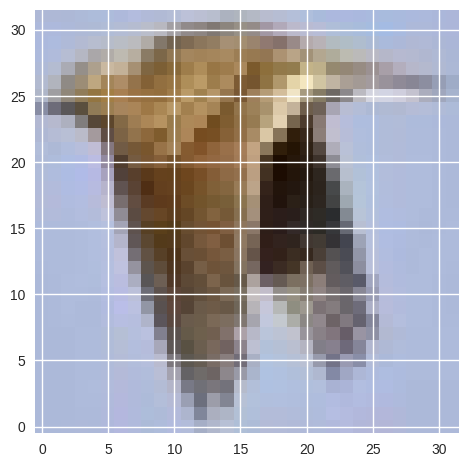

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(X1b.astype('uint8'), origin='lower')

In [ ]:
X1b.shape

(32, 32, 3)

In [ ]:
# Load the raw CIFAR-10 data.
cifar10_dir = '/content/cigar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [ ]:
# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


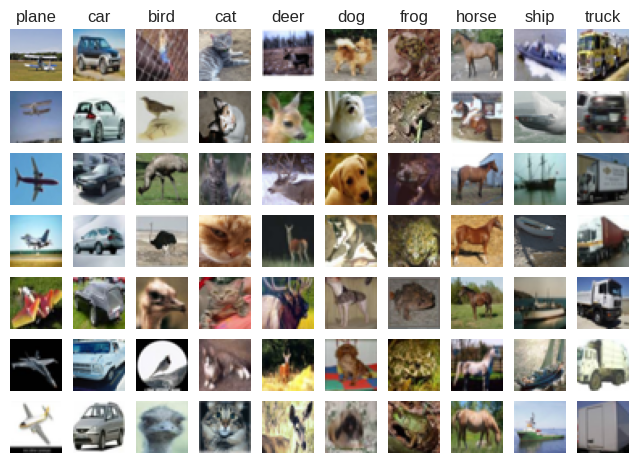

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

One day... I will investigate why my environment plots mirror images... Sigh.

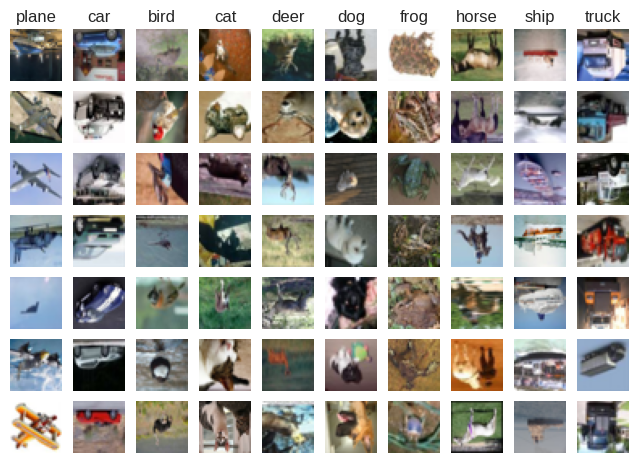

In [ ]:
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        flipped = np.flip(X_train[idx], (0,1))
        plt.imshow(flipped.astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

In [ ]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [ ]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print ('Training data shape: ', X_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Test data shape: ', X_test.shape)
print ('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


We subtract the mean image. This is a a rescaling operation. By subtracting the image mean, we ensure all pixel values are in a similar range, so that factors such as image saturation (high intensity values) does not become a discriminating factor.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


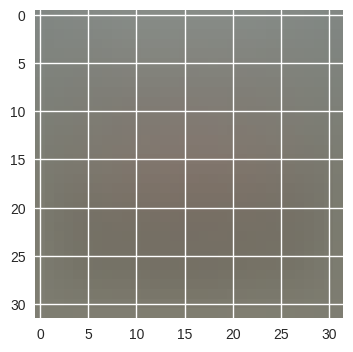

In [ ]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print (mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [ ]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [ ]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print (X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


### SVM Classifier
The function `compute_loss_naive()` evaluates the multiclass SVM loss function.

In [ ]:
import sys
sys.path.append('/code/')

#from sklearn.svm import LinearSVC
import linearsvm
import gradientcheck
import linearclassifier


In [ ]:
import time

# generate a random SVM weight matrix of small numbers
W = np.random.randn(3073, 10) * 0.0001

loss, grad = linearsvm.svm_loss_naive(W, X_dev, y_dev, 0.00001)
print ('loss: %f' % (loss, ))

loss: 8.980171


In [ ]:
# Recompute the gradient and gradient check it with grad_check_sparse

# Compute the loss and its gradient at W.
loss, grad = linearsvm.svm_loss_naive(W, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
f = lambda w: linearsvm.svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = gradientcheck.grad_check_sparse(f, W, grad)

# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = linearsvm.svm_loss_naive(W, X_dev, y_dev, 1e2)
f = lambda w: linearsvm.svm_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = gradientcheck.grad_check_sparse(f, W, grad)

numerical: -10.204555 analytic: -10.204555, relative error: 3.556907e-11
numerical: 2.876219 analytic: 2.876219, relative error: 6.462326e-11
numerical: 7.418848 analytic: 7.418848, relative error: 4.642297e-11
numerical: 5.186410 analytic: 5.151551, relative error: 3.371916e-03
numerical: -14.168926 analytic: -14.168926, relative error: 1.051308e-11
numerical: -10.292663 analytic: -10.292663, relative error: 1.333010e-11
numerical: -3.271376 analytic: -3.271376, relative error: 5.378903e-11
numerical: 3.423688 analytic: 3.423688, relative error: 1.346173e-10
numerical: 3.494203 analytic: 3.494203, relative error: 6.321275e-11
numerical: -8.308292 analytic: -8.308292, relative error: 6.898963e-11
numerical: 1.938184 analytic: 1.938184, relative error: 1.822901e-10
numerical: -4.780945 analytic: -4.780945, relative error: 3.641666e-11
numerical: 22.137883 analytic: 22.137883, relative error: 6.432808e-12
numerical: -3.801988 analytic: -3.801988, relative error: 7.555077e-11
numerical: -

In [ ]:
tic = time.time()
loss_naive, grad_naive = linearsvm.svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, _ = linearsvm.svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print ('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 8.980171e+00 computed in 0.120005s
Vectorized loss: 8.980171e+00 computed in 0.013513s
difference: -0.000000


In [ ]:
# The naive implementation and the vectorized implementation should match.
# The vectorized version should still be much faster.
tic = time.time()
_, grad_naive = linearsvm.svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = linearsvm.svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('Vectorized loss and gradient: computed in %fs' % (toc - tic))

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them.
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print ('difference: %f' % difference)

Naive loss and gradient: computed in 0.098232s
Vectorized loss and gradient: computed in 0.012715s
difference: 0.000000


Train the linear classifier

In [ ]:
svm = linearclassifier.LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print ('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 786.297286
iteration 100 / 1500: loss 287.307142
iteration 200 / 1500: loss 107.925179
iteration 300 / 1500: loss 42.451391
iteration 400 / 1500: loss 19.097025
iteration 500 / 1500: loss 10.585246
iteration 600 / 1500: loss 7.206198
iteration 700 / 1500: loss 6.250825
iteration 800 / 1500: loss 5.229913
iteration 900 / 1500: loss 5.505391
iteration 1000 / 1500: loss 5.383865
iteration 1100 / 1500: loss 5.557026
iteration 1200 / 1500: loss 5.261747
iteration 1300 / 1500: loss 5.622801
iteration 1400 / 1500: loss 5.755260
That took 10.484259s


Plot the loss as a function of iteration number:

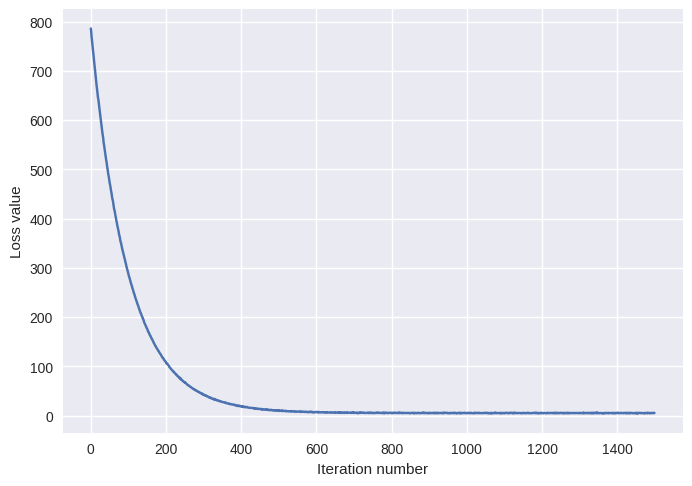

In [ ]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

Evaluate  performance on both the training and validation set:

In [ ]:
y_train_pred = svm.predict(X_train)
print ('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print ('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.368776
validation accuracy: 0.385000


Use validation set to tune hyperparameters (regularization strength and learning rate).

Experiment with different ranges for the learning rates and regularization strengths/

We should be able to get a classification accuracy of about 0.4 on the validation set.

In [ ]:
from linearclassifier import LinearSVM
learning_rates = [8e-8, 1e-7, 2e-7, 3e-7, 5e-7]
regularization_strengths = [1e4, 2.5e4, 3e4, 4e4, 5e4, 7.5e4, 1e5, 2e5]

# Further initialization
results_refined = {}
best_val_refined = -1
best_svm_refined = None

# Train SVMs with different hyperparameters
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train, y_train, learning_rate=lr, reg=reg, num_iters=7000)  # Increased iterations

        y_train_pred = svm.predict(X_train)
        training_accuracy = np.mean(y_train == y_train_pred)

        y_val_pred = svm.predict(X_val)
        validation_accuracy = np.mean(y_val == y_val_pred)

        results_refined[(lr, reg)] = (training_accuracy, validation_accuracy)

        if validation_accuracy > best_val_refined:
            best_val_refined = validation_accuracy
            best_svm_refined = svm

# Display the results
hyperparameter_results = []
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    hyperparameter_results.append((lr, reg, train_accuracy, val_accuracy))

best_validation_accuracy = best_val
hyperparameter_results, best_validation_accuracy

([(5e-08, 20000.0, 0.3553061224489796, 0.353),
  (5e-08, 50000.0, 0.3733265306122449, 0.376),
  (5e-08, 100000.0, 0.36475510204081635, 0.371),
  (1e-07, 20000.0, 0.38702040816326533, 0.393),
  (1e-07, 50000.0, 0.37026530612244896, 0.383),
  (1e-07, 100000.0, 0.35814285714285715, 0.36),
  (2e-07, 20000.0, 0.37404081632653063, 0.382),
  (2e-07, 50000.0, 0.35353061224489796, 0.366),
  (2e-07, 100000.0, 0.3553469387755102, 0.357)],
 0.393)

Visualize cross-validation results:

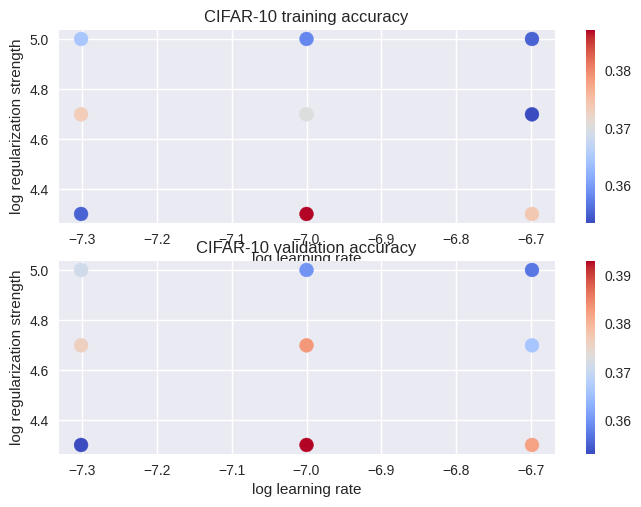

In [ ]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap='coolwarm')
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap='coolwarm')
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

Evaluate the best svm on test set:

In [ ]:
y_test_pred = best_svm_refined.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.366000


Despite modifying the regularization and learning rates by introducing additional parameters and increasing the number of training epochs, there was no noticeable improvement in the accuracy of the model.

Visualize the learned weights for each class.

Depending on choice of learning rate and regularization strength, these may be interesting to visualize.

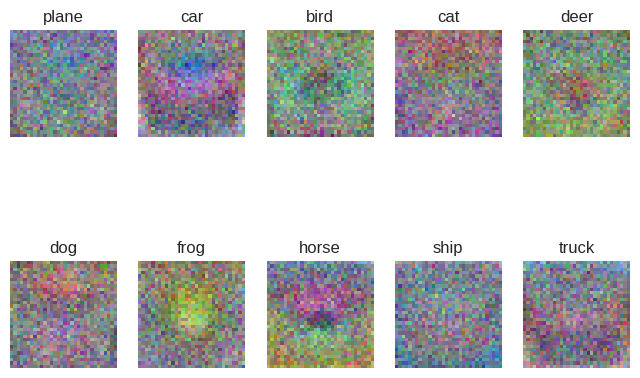

In [ ]:
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

# Lab3: Points dataset using Lagrange multipliers



In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

In [ ]:
from scipy.optimize import Bounds, BFGS
from scipy.optimize import LinearConstraint, minimize

import sklearn.datasets as dt

In [ ]:
ZERO = 1e-7

## Defining the data points and labels
We define a simple dataset.

Just to recall support vectors are those points for which $\alpha>0$.

In [ ]:
#dat = np.array([[0, 3], [-1, 0], [1, 2], [2, 1], [3,3], [0, 0], [-1, -1], [-3, 1], [3, 1]])
#labels = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1])

dat = np.array([[np.random.randint(7) - 3, np.random.randint(7) - 3] for x in range(10)])
#labels = np.array([np.random.randint(2) - 1 for x in range(10)])
labels = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])
len(dat), len(labels), dat, labels

(10,
 10,
 array([[-3,  3],
        [ 0, -2],
        [ 0,  0],
        [ 2, -2],
        [ 3, -2],
        [-2, -2],
        [ 2, -3],
        [ 1, -1],
        [-3,  0],
        [-1,  3]]),
 array([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1]))

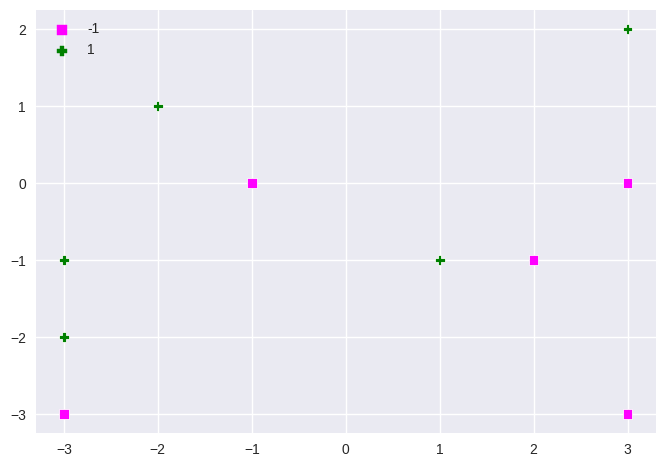

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_x(data, labels, alpha=[], C=0):
    sns.scatterplot(x=data[:, 0], y=data[:, 1], style=labels,
                    hue=labels, markers=['s', 'P'],
                    palette=['magenta', 'green'])
    if len(alpha) > 0:
        alpha_str = np.char.mod('%.1f', np.round(alpha, 1))
        ind_sv = np.where(alpha > 0)[0]
        for i in ind_sv:
            plt.gca().text(data[i, 0], data[i, 1] - 0.25, alpha_str[i])

# Assuming data and labels are defined elsewhere in your code
plot_x(data, labels)


## Defining the Objective Function
Our objective function is $L_d$ defined above, which has to be maximized.

Since we are using the `minimize()` function from `scipy.optimize`, we multiply $L_d$ by (-1) and  maximize it.

The first parameter for the objective function is the variable with respect to which the optimization takes place.

We also need the training points and the corresponding labels as additional arguments.

In [ ]:
# Objective function
def lagrange_dual(alpha, x, t):
    result = 0
    ind_sv = np.where(alpha > ZERO)[0]
    for i in ind_sv:
        for k in ind_sv:
            result = result + alpha[i]*alpha[k]*t[i]*t[k]*np.dot(x[i, :], x[k, :])
    result = 0.5*result - sum(alpha)
    return result

## Defining the Linear Constraints
The linear constraint on alpha for each point is given by:

$$
\sum_i \alpha_i t_i = 0
$$

$$
\alpha_0 t_0 + \alpha_1 t_1 + \ldots \alpha_m t_m = 0
$$

The `LinearConstraint()` method from `scipy.optimize` requires all constraints to be written as matrix form, which is:

\begin{equation}
0 =
\begin{bmatrix}
t_0 & t_1 & \ldots t_m
\end{bmatrix}
\begin{bmatrix}
\alpha_0\\ \alpha_1 \\ \vdots \\ \alpha_m
\end{bmatrix}
= 0
\end{equation}

The first matrix is the first parameter in the `LinearConstraint()` method. The left and right bounds are the second and third arguments.

In [ ]:
linear_constraint = LinearConstraint(labels, [0], [0])
print(linear_constraint)

## Defining the Bounds
The bounds on alpha are defined using the `Bounds()` method from `scipy.optimize`.

All alphas are constrained to lie between 0 and $C$. Here is an example for $C=10$.

In [ ]:
bounds_alpha = Bounds(np.zeros(dat.shape[0]), np.full(dat.shape[0], 10))
print(bounds_alpha)

Bounds(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))


## Defining the function to find alphas
Let’s write the overall routine to find the optimal values of alpha with the given parameters $x$, $t$, and $C$.

The objective function requires the additional arguments $x$ and $t$, which are passed via args in `minimize()`.

In [ ]:
def optimize_alpha(x, t, C):
    m, n = x.shape
    np.random.seed(1)

    # Initialize alphas to random values
    alpha_0 = np.random.rand(m)*C

    # Define the constraint
    linear_constraint = LinearConstraint(t, [0], [0])

    # Define the bounds
    bounds_alpha = Bounds(np.zeros(m), np.full(m, C))

    # Find the optimal value of alpha
    result = minimize(lagrange_dual, alpha_0, args = (x, t), method='trust-constr',
                      hess=BFGS(), constraints=[linear_constraint],
                      bounds=bounds_alpha)

    # The optimized value of alpha lies in result.x
    alpha = result.x
    return alpha

## Determining the hyperplane
The expression for the hyperplane is given by:
$$
w^T x + b = 0
$$

For the hyperplane, we need the weight vector $\mathbf{w}$ and the constant $b$. The weight vector is given by:
$$
w = \sum_i \alpha_i t_i x_i
$$

If there are too many training points, it’s best to use only support vectors with $\alpha>0$ to compute the weight vector.

For $b$, we’ll compute it from each support vector $s$, for which $\alpha_s < C$, and then take the average. For a single support vector $x_s$, $b$ is given by:

$$
b = t_s – w^T x_s
$$

A support vector’s alpha cannot be numerically exactly equal to $C$. Hence, we can subtract a small constant from $C$ to find all support vectors with $\alpha_s < C$.

This is done in the `get_b()` function.

In [ ]:
def get_w(alpha, t, x):
    m = len(x)
    # Get all support vectors
    w = np.zeros(x.shape[1])
    for i in range(m):
        w = w + alpha[i]*t[i]*x[i, :]
    return w

def get_w0(alpha, t, x, w, C):
    C_numeric = C-ZERO
    # Indices of support vectors with alpha<C
    ind_sv = np.where((alpha > ZERO)&(alpha < C_numeric))[0]
    b = 0.0
    for s in ind_sv:
        b = b + t[s] - np.dot(x[s, :], w)
    # Take the average
    b = b / len(ind_sv)
    return b

## Classifying Test Points
To classify a test point $x_{test}$, we use the sign of $y(x_{test})$ as:

$$
\text{label}_{x_{test}} = \text{sign}(y(x_{test})) = \text{sign}(w^T x_{test} + b)
$$

Let’s write the corresponding function that can take as argument an array of test points along with $w$ and $w_0$ and classify various points. We have also added a second function for calculating the misclassification rate:

In [ ]:
def classify_points(x_test, w, b):
    # get y(x_test)
    predicted_labels = np.sum(x_test*w, axis=1) + b
    predicted_labels = np.sign(predicted_labels)
    # Assign a label arbitrarily a +1 if it is zero
    predicted_labels[predicted_labels==0] = 1
    return predicted_labels

def misclassification_rate(labels, predictions):
    total = len(labels)
    errors = sum(labels != predictions)
    return errors/total*100

## Plotting the margin and hyperplane
Let’s also define functions to plot the hyperplane and the soft margin.

In [ ]:
def plot_hyperplane(w, b):
    x_coord = np.array(plt.gca().get_xlim())
    y_coord = -b/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, y_coord, color='red')
    return

def plot_margin(w, b):
    x_coord = np.array(plt.gca().get_xlim())
    ypos_coord = 1/w[1] - b/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, ypos_coord, '--', color='green')
    yneg_coord = -1/w[1] - b/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, yneg_coord, '--', color='magenta')
    return

# Results
It’s now time to run the SVM. The function `display_SVM_result()` will help us visualize.

We’ll initialize `alpha` to random values, define $C$ and find the best values of `alpha` in this function.

We’ll also plot the hyperplane, the margin and the data points. The support vectors would also be labelled by their corresponding alpha value. The title of the plot would be the percentage of errors and number of support vectors.

In [ ]:
def display_SVM_result(x, t, C):
    # Get the alphas
    alpha = optimize_alpha(x, t, C)
    # Get the weights
    w = get_w(alpha, t, x)
    w0 = get_w0(alpha, t, x, w, C)
    plot_x(x, t, alpha, C)
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    plot_hyperplane(w, w0)
    plot_margin(w, w0)
    plt.xlim(xlim)
    plt.ylim(ylim)
    # Get the misclassification error and display it as title
    predictions = classify_points(x, w, w0)
    err = misclassification_rate(t, predictions)
    title = 'C = ' + str(C) + ',  Errors: ' + '{:.1f}'.format(err) + '%'
    title = title + ',  total SV = ' + str(len(alpha[alpha > ZERO]))
    plt.title(title)

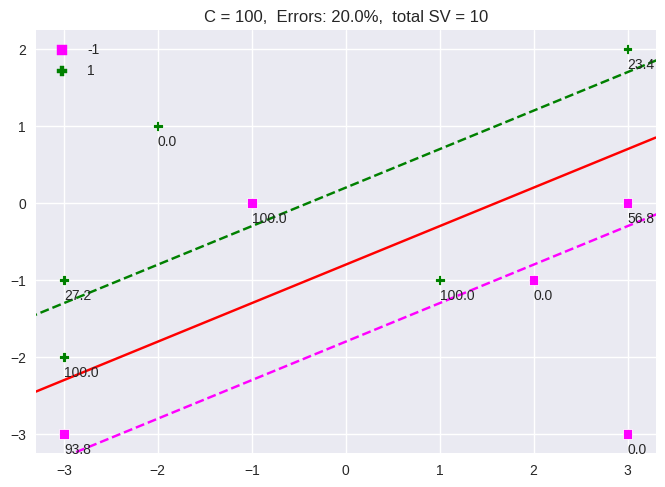

In [ ]:
display_SVM_result(data, labels, 100)
plt.show()

## The Effect of C
If you change the value of C to $\infty$, then the **soft margin** turns into a **hard margin**, with no tolerance for errors. The problem we defined above is not solvable in this case. Let’s generate an artificial set of points and look at the effect of C on classification. To understand the entire problem, we’ll use a simple dataset, where the positive and negative examples are separable.

Below are the points generated via make_blobs():

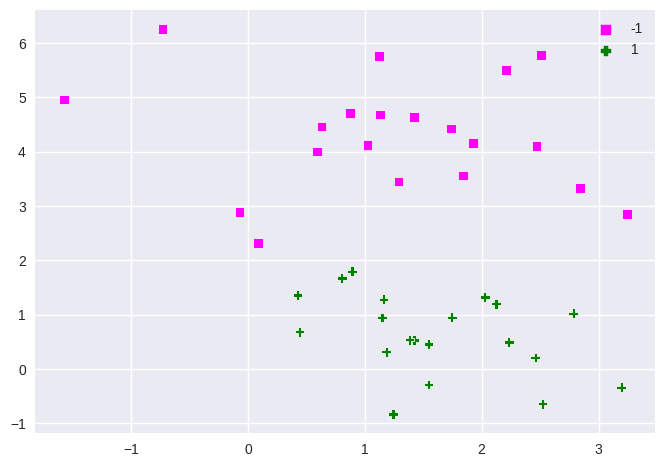

In [ ]:
data, labels = dt.make_blobs(n_samples=[20,20],
                           cluster_std=1,
                           random_state=0)
labels[labels==0] = -1
plot_x(data, labels)

Now let’s define different values of C and run the code.

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


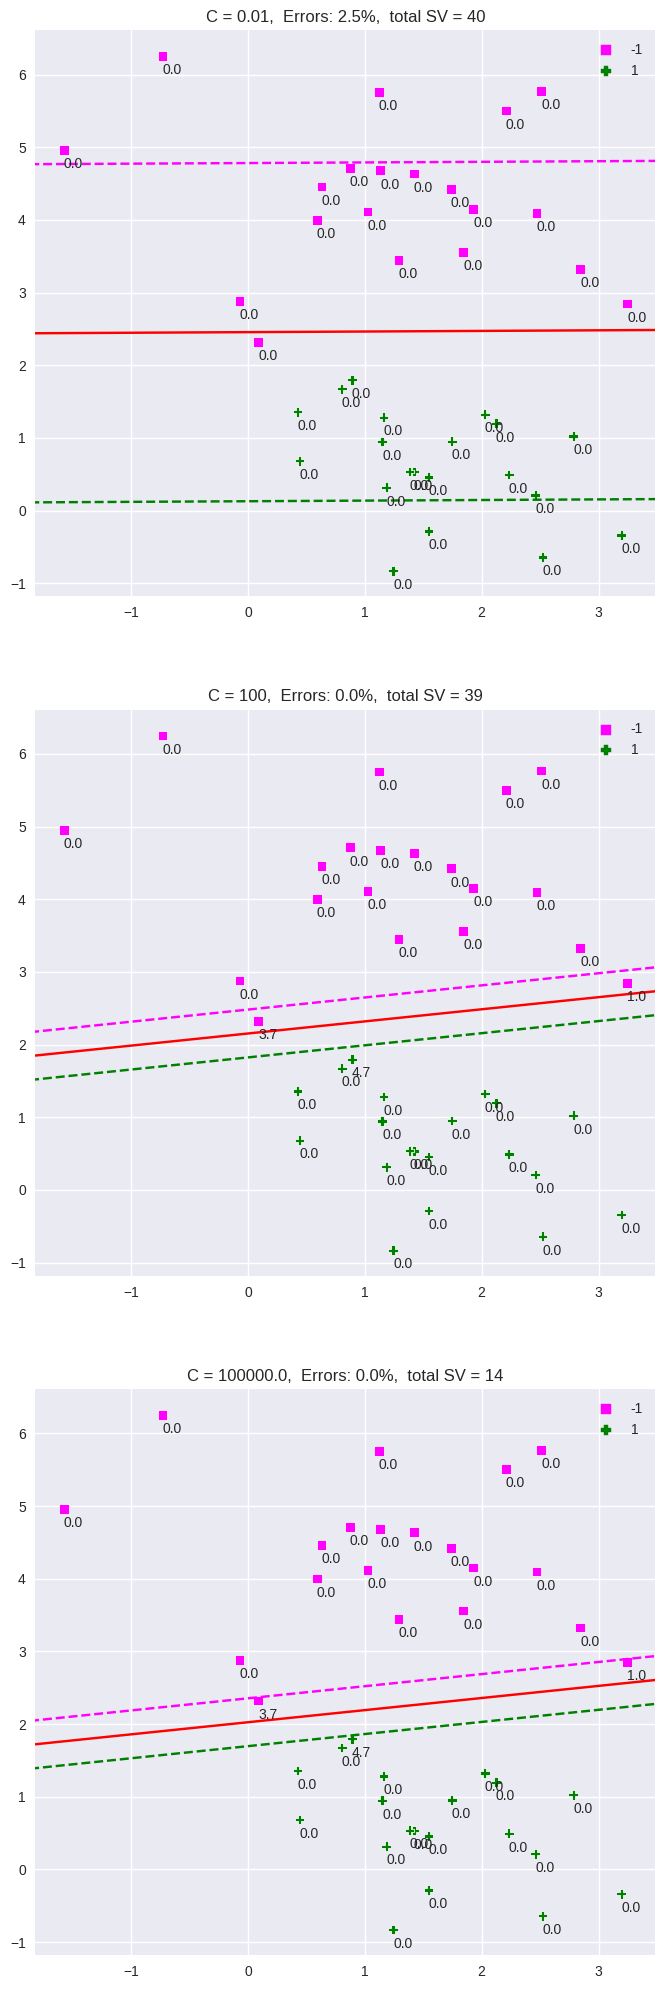

In [ ]:
fig = plt.figure(figsize=(8,25))

i=0
C_array = [1e-2, 100, 1e5]

for C in C_array:
    fig.add_subplot(311+i)
    display_SVM_result(data, labels, C)
    i = i + 1

The above is an example which shows that increasing $C$, decreases the margin.

A high value of $C$ adds a stricter penalty on errors.

A smaller value allows a wider margin and more misclassification errors.

Hence, $C$ defines a tradeoff between the maximization of margin and classification errors.

# Lab 4: CIFAR with Sklearn's SVM
Using PCA and a radial basis function (rbf) sklearn SVC.

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=200, whiten=True, random_state=42)
#pca = RandomizedPCA(n_components=20, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train.shape, y_train.shape

((49000, 3073), (49000,))

In [ ]:
X_test.shape, y_test.shape

((1000, 3073), (1000,))

In [ ]:
X_train_reduced = X_train[:1000]
y_train_reduced = y_train[:1000]

In [ ]:
X_train_reduced.shape, y_train_reduced.shape

((1000, 3073), (1000,))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [0.5, 1, 5, 10, 50, 100],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train_reduced, y_train_reduced)
print(grid.best_params_)

CPU times: user 5min 18s, sys: 3min 37s, total: 8min 55s
Wall time: 5min 25s
{'svc__C': 10, 'svc__gamma': 0.0001}


In [ ]:
X_train_reduced = X_train[:10000]
y_train_reduced = y_train[:10000]

In [ ]:
X_train_reduced.shape, y_train_reduced.shape

((10000, 3073), (10000,))

In [ ]:
#param_grid = {'svc__C': [0.5, 1, 5, 10],
#              'svc__gamma': [0.005, 0.01, 0.05, 0.1]}
param_grid = {'svc__C': [0.5, 1, 5, 10],
              'svc__gamma': [0.05, 0.1, 0.5]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train_reduced, y_train_reduced)
print(grid.best_params_)

CPU times: user 36min 44s, sys: 2min 43s, total: 39min 27s
Wall time: 33min 7s
{'svc__C': 5, 'svc__gamma': 0.05}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [ ]:
X_test_reduced = X_test[:10000]
y_test_reduced = y_test[:10000]

In [ ]:
X_test_reduced.shape, y_test_reduced.shape

((1000, 3073), (1000,))

In [ ]:
model = grid.best_estimator_
y_fit = model.predict(X_test_reduced)

Let's take a look at a few of the test images along with their predicted values:

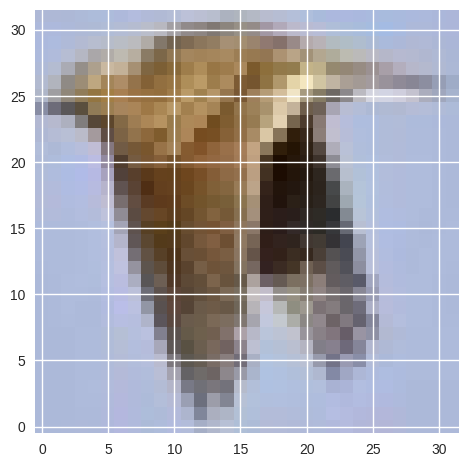

In [ ]:
X1 = db1['data'][123].reshape(3, 32, 32).transpose(1,2,0).astype("float")
plt.imshow(X1b.astype('uint8'), origin='lower')

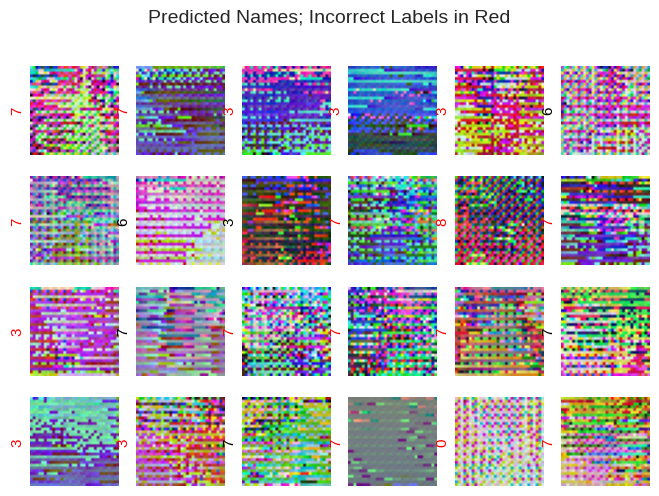

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i][:3072].reshape(3, 32, 32).transpose(1,2,0).astype('uint8'), origin='lower')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(y_fit[i],
                   color='black' if y_fit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

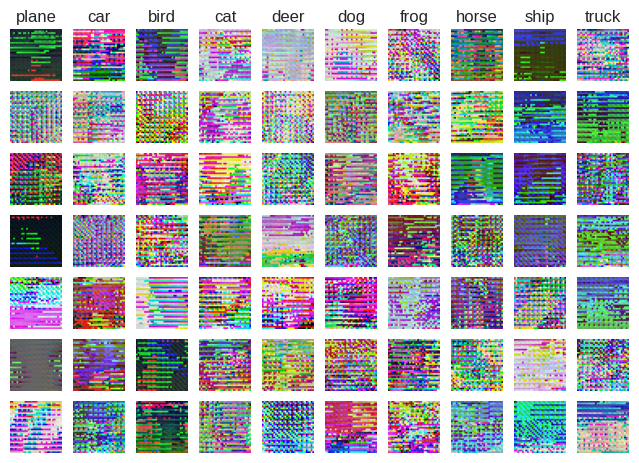

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_test == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_test[idx][:3072].reshape(3, 32, 32).transpose(1,2,0).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Lab 5: Political figures dataset with sklearn's SVM

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


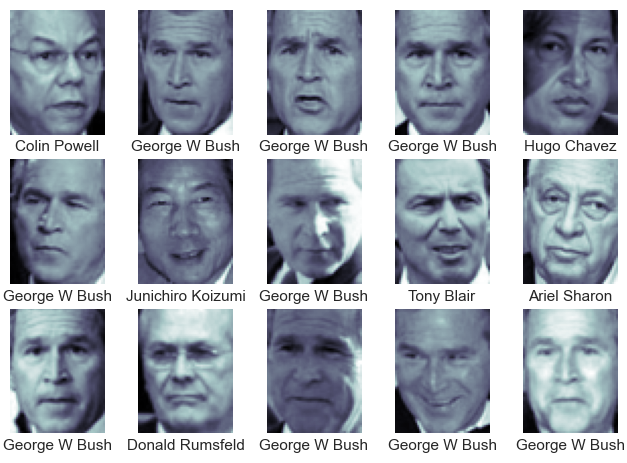

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

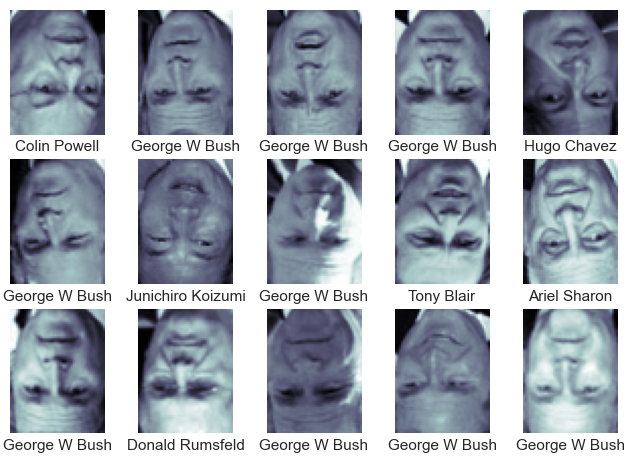

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    flipped = np.flip(faces.images[i], 0)
    axi.imshow(flipped, cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
faces.images.shape, faces.data.shape, faces.target.shape

((1348, 62, 47), (1348, 2914), (1348,))

In [ ]:
62 * 47

2914

In [ ]:
faces_flattened = np.zeros((1348, 2914))
for i in range(1348):
    faces_flattened[i] = faces.images[i].flatten()

faces_flattened[0]

array([0.53333336, 0.52418303, 0.49673203, ..., 0.00653595, 0.00653595,
       0.00130719])

In [ ]:
faces.data[0]

array([0.53333336, 0.52418303, 0.49673203, ..., 0.00653595, 0.00653595,
       0.00130719], dtype=float32)

In [ ]:
faces_flattened == faces.data

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
(faces_flattened == faces.data).all()

True

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
Xtrain.shape , Xtest.shape , ytrain.shape , ytest.shape

((1011, 2914), (337, 2914), (1011,), (337,))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 3min 53s, sys: 28.2 s, total: 4min 21s
Wall time: 41.5 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

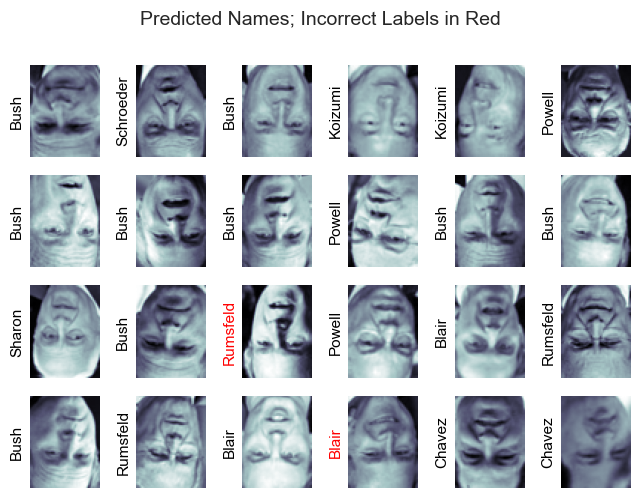

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    #axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    flipped = np.flip(Xtest[i].reshape(62, 47), 0)
    axi.imshow(flipped, cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



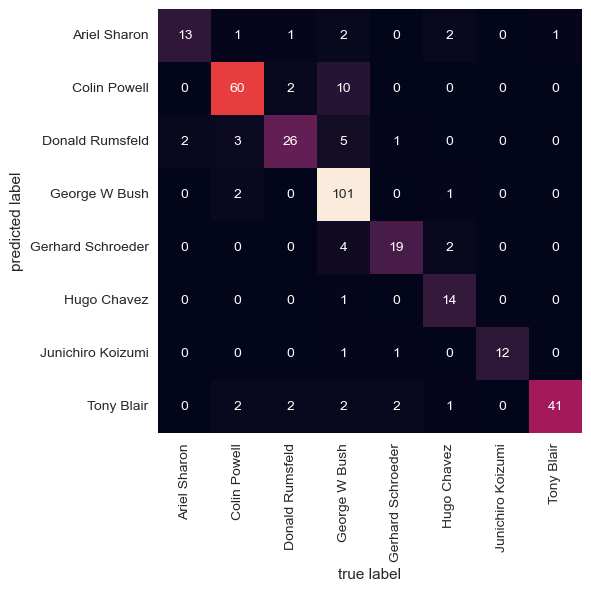

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## CIFAR With SVM


In [213]:
from keras.datasets import cifar10
from sklearn.decomposition import PCA


In [209]:
X_train, y_train, X_test, y_test = cifar10.load_data()

X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32')

170498071/170498071 [==============================] - 7s 0us/step


In [230]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

In [221]:
param_grid = {'C': [1, 3,7, 10],
              'gamma': [0.003, 0.004, 0.005],
              'class_weight': [None, 'balanced'],
              'kernel':['rbf', 'poly']
}

pca = PCA(n_components = 150, whiten=True, random_state=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = SVC(kernel='rbf', max_iter= 3)

In [222]:
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(max_iter=3), n_jobs=-1,
             param_grid={'C': [1, 3, 7, 10], 'class_weight': [None, 'balanced'],
                         'gamma': [0.003, 0.004, 0.005],
                         'kernel': ['rbf', 'poly']})

In [223]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model_selected = grid_search.best_estimator_

y_pred = model_selected.predict(X_test_pca)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [224]:
print(confusion_matrix)

[[276  52 104   9  57  35   7  56 324  80]
 [544 137 132  16  45  31  13  11  56  15]
 [224  50 122  14  79  65  29  75 298  44]
 [368  76 152  27  64  55  27  43 169  19]
 [141  26 124  14  79  53  35 150 340  38]
 [363  74 157  36  66  77  20  46 132  29]
 [194  43 138  22  98  99  42  80 266  18]
 [399 114 184  18  63  39  21  49  99  14]
 [257  60 118   7  49  40  11  27 351  80]
 [529 152  94  13  62  25  10   9  85  21]]


In [225]:
report = classification_report(y_test, y_pred,  target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.08      0.28      0.13      1000
  automobile       0.17      0.14      0.15      1000
        bird       0.09      0.12      0.10      1000
         cat       0.15      0.03      0.05      1000
        deer       0.12      0.08      0.10      1000
         dog       0.15      0.08      0.10      1000
        frog       0.20      0.04      0.07      1000
       horse       0.09      0.05      0.06      1000
        ship       0.17      0.35      0.23      1000
       truck       0.06      0.02      0.03      1000

    accuracy                           0.12     10000
   macro avg       0.13      0.12      0.10     10000
weighted avg       0.13      0.12      0.10     10000



We can see that SVC doesnt work well with images. This might be due to the  high dimensionality of images. Images have a large number of pixels, which leads to a very high-dimensional feature space. SVMs struggle with high-dimensional data due to the curse of dimensionality which makes it difficult to find an optimal hyperplane to separate classes effectively.

## CIFAR with SGD

In [237]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='hinge', alpha=0.002, max_iter= 270, tol=1e-4, random_state= 10)
clf.fit(X_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.002, max_iter=270, random_state=10, tol=0.0001)

In [238]:
y_pred = clf.predict(X_test_pca)
confusion = confusion_matrix(y_test, y_pred)

In [239]:
report = classification_report(y_test, y_pred,  target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.43      0.33      0.37      1000
  automobile       0.38      0.46      0.42      1000
        bird       0.17      0.11      0.14      1000
         cat       0.19      0.11      0.14      1000
        deer       0.26      0.32      0.29      1000
         dog       0.28      0.25      0.26      1000
        frog       0.32      0.32      0.32      1000
       horse       0.31      0.39      0.34      1000
        ship       0.38      0.52      0.44      1000
       truck       0.35      0.37      0.36      1000

    accuracy                           0.32     10000
   macro avg       0.31      0.32      0.31     10000
weighted avg       0.31      0.32      0.31     10000



The relatively low 30% accuracy can be due to the dataset's complexity, limited model capacity. This can be improved with ANN or CNN like models

## Part 2

Run SVM (with sklearn) for LES dataset:

1.   Use a nicely predictable feature (data column) as label. You pick! Then,
2.   Use the quantized (no precipitation / low precipitation / medium precipitation / high precipitation) precipitation feature as the label and attempt to predict that feature using any or all of the other features. Compare results with your decision tree version.




In [184]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt

In [185]:
df = pd.read_csv('MI-14850-2011Fall-2012Spring.csv',skiprows=8)

In [186]:
#dropping the last column as it seems to be empty
df.drop(df.columns[-1], axis=1,inplace = True)

In [187]:
# Replacing all the missing values with 'm'
df.replace('m', np.nan, inplace=True)

In [188]:
df.isnull().sum()

Date                       0
Time                      11
Temp (F)                   6
RH (%)                     8
Dewpt (F)                  6
Wind Spd (mph)             7
Wind Direction (deg)       6
Peak Wind Gust(mph)     4148
Low Cloud Ht (ft)          6
Med Cloud Ht (ft)       2976
High Cloud Ht (ft)      4450
Visibility (mi)            6
Atm Press (hPa)            6
Sea Lev Press (hPa)        6
Altimeter (hPa)            6
Precip (in)              191
Wind Chill (F)             6
Heat Index (F)             6
dtype: int64

Dropping the columns which have high missing values, date and time columns

1.   Peak Wind Gust
2.   Med Cloud Ht
3.   High Coud Ht
4.   Date
5.   Time


In [189]:
df.drop(["Peak Wind Gust(mph)", "Med Cloud Ht (ft)", "High Cloud Ht (ft)", "Date", "Time"], axis = 1, inplace = True)

In [190]:
df.isnull().sum()

Temp (F)                  6
RH (%)                    8
Dewpt (F)                 6
Wind Spd (mph)            7
Wind Direction (deg)      6
Low Cloud Ht (ft)         6
Visibility (mi)           6
Atm Press (hPa)           6
Sea Lev Press (hPa)       6
Altimeter (hPa)           6
Precip (in)             191
Wind Chill (F)            6
Heat Index (F)            6
dtype: int64

In [191]:
# Imputing all the other columns except precipitation with the mean values
specified_columns = [
    'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)',
    'Low Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)',
    'Altimeter (hPa)', 'Wind Chill (F)', 'Heat Index (F)'
]
for col in specified_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values in the specified columns with their respective mean values
for col in specified_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [192]:
df.isnull().sum()

Temp (F)                  0
RH (%)                    0
Dewpt (F)                 0
Wind Spd (mph)            0
Wind Direction (deg)      0
Low Cloud Ht (ft)         0
Visibility (mi)           0
Atm Press (hPa)           0
Sea Lev Press (hPa)       0
Altimeter (hPa)           0
Precip (in)             191
Wind Chill (F)            0
Heat Index (F)            0
dtype: int64

In [193]:
df = df[df['Precip (in)'] != 'm']
df = df.dropna(subset=['Precip (in)'])
df['Precip (in)'] = df['Precip (in)'].astype('float')

Categorizing Precipitation into 4 bins which are No precipitation, Low precipitation, Medium precipitation and High precipitation

In [194]:
def categorize_precipitation(value):
    if value == 0:
        return "No precipitation"
    elif 0 < value <= 0.01:
        return "Low precipitation"
    elif 0.01 < value <= 0.1:
        return "Medium precipitation"
    else:
        return "High precipitation"
df['Precip Category'] = df['Precip (in)'].apply(categorize_precipitation)

## Using temperature as the target variable

In [195]:
df['Temp (F)'] = pd.to_numeric(df['Temp (F)'], errors='coerce')

# Drop rows with NaN values in 'Temp (F)' column
df = df.dropna(subset=['Temp (F)'])

# Binning the 'Temp (F)' column
bins = [-np.inf, 32, 70, np.inf]  # Freezing, Moderate, Hot
labels = ['Low', 'Medium', 'High']
df['Temp Category'] = pd.cut(df['Temp (F)'], bins=bins, labels=labels)

# Display the distribution of the binned temperature categories
df['Temp Category'].value_counts()

Medium    3280
Low       1401
High       251
Name: Temp Category, dtype: int64

<ipython-input-196-bbc1415311df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


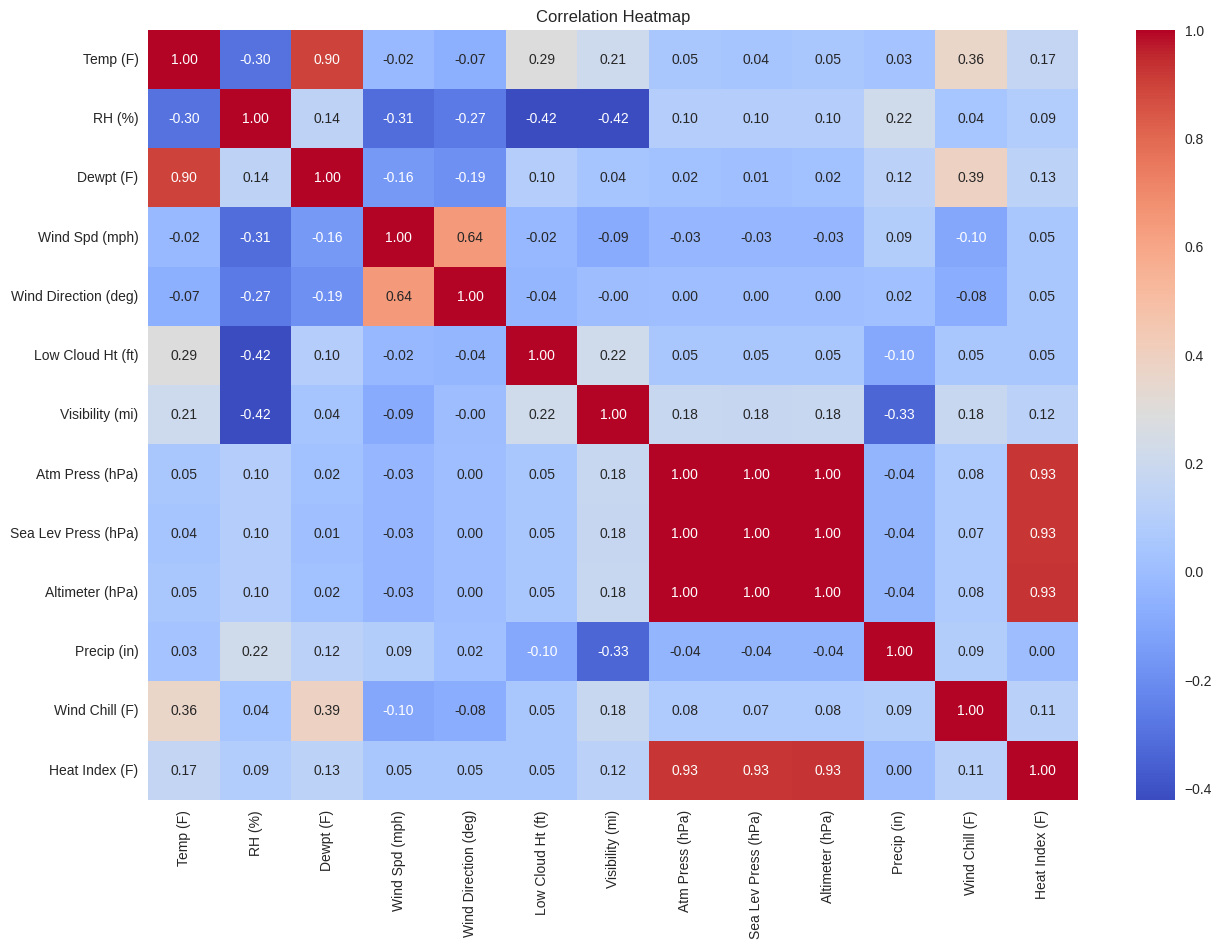

In [196]:
corr_matrix = df.corr()

# Plot the heatmap with values printed and warm-cool hue
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [197]:
threshold = 0.3 # this can be customized
# Identify columns that are highly correlated with 'Temp (F)'
highly_correlated_cols = corr_matrix[corr_matrix['Temp (F)'].abs() > threshold].index
# Exclude 'Temp (F)' from the list
highly_correlated_cols = highly_correlated_cols.drop('Temp (F)')
highly_correlated_cols.tolist()

['Dewpt (F)', 'Wind Chill (F)']

## Building SVM model with Dewpt (F), 'Wind Chill (F) to predict Temperature

In [198]:
X_selected = df[['Dewpt (F)', 'Wind Chill (F)']]
y_selected = df['Temp Category']

# Split the data into training and test sets (80% train, 20% test)
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Standardize the features
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

# Train the SVM model
svm_model_selected = SVC()
svm_model_selected.fit(X_train_selected_scaled, y_train_selected)

# Predict on the test set and evaluate the model
y_pred_selected = svm_model_selected.predict(X_test_selected_scaled)
classification_results_selected = classification_report(y_test_selected, y_pred_selected)

print(classification_results_selected)


              precision    recall  f1-score   support

        High       0.86      0.20      0.32        60
         Low       0.88      0.90      0.89       267
      Medium       0.89      0.95      0.92       660

    accuracy                           0.89       987
   macro avg       0.88      0.68      0.71       987
weighted avg       0.89      0.89      0.87       987



## Model optimization

In [199]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, scoring='f1_macro', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_selected_scaled, y_train_selected)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Train the SVM model using the best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_train_selected_scaled, y_train_selected)

# Predict on the test set and evaluate
y_pred_best = best_svm.predict(X_test_selected_scaled)
classification_report_best = classification_report(y_test_selected, y_pred_best)



Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [200]:
print(classification_report_best)

              precision    recall  f1-score   support

        High       0.81      0.22      0.34        60
         Low       0.89      0.90      0.89       267
      Medium       0.89      0.95      0.92       660

    accuracy                           0.89       987
   macro avg       0.87      0.69      0.72       987
weighted avg       0.89      0.89      0.88       987



## Using Precipitation as  the target column

In [201]:
# Set a threshold for high correlation
threshold = 0.3
# Identify columns that are highly correlated with 'Precip (in)'
highly_correlated_cols = corr_matrix[corr_matrix['Precip (in)'].abs() > threshold].index
# Exclude 'Temp (F)' from the list
highly_correlated_cols = highly_correlated_cols.drop('Precip (in)')
highly_correlated_cols.tolist()


['Visibility (mi)']

As we can see that even setting the threshold too low as 0.3 we have only one column which is correlated with precipitation. So we will use all the features to predict precipitation

In [202]:
# Selecting the specified features and target label
X_selected = df.drop(['Precip (in)', 'Precip Category', 'Temp Category'], axis=1)
y_selected = df['Precip Category']

# Split the data into training and test sets (80% train, 20% test)
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Standardize the features
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

# Train the SVM model
svm_model_selected = SVC()
svm_model_selected.fit(X_train_selected_scaled, y_train_selected)

# Predict on the test set and evaluate the model
y_pred_selected = svm_model_selected.predict(X_test_selected_scaled)
classification_results_selected = classification_report(y_test_selected, y_pred_selected)

print(classification_results_selected)


                      precision    recall  f1-score   support

  High precipitation       0.00      0.00      0.00         4
   Low precipitation       1.00      0.03      0.06        35
Medium precipitation       0.60      0.38      0.47        39
    No precipitation       0.94      1.00      0.97       909

            accuracy                           0.93       987
           macro avg       0.64      0.35      0.37       987
        weighted avg       0.93      0.93      0.91       987



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Optimization

In [203]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, scoring='f1_macro', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_selected_scaled, y_train_selected)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Train the SVM model using the best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_train_selected_scaled, y_train_selected)

# Predict on the test set and evaluate
y_pred_best = best_svm.predict(X_test_selected_scaled)
classification_report_best = classification_report(y_test_selected, y_pred_best)



Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [204]:
print(classification_report_best)

                      precision    recall  f1-score   support

  High precipitation       0.50      0.50      0.50         4
   Low precipitation       0.41      0.20      0.27        35
Medium precipitation       0.39      0.41      0.40        39
    No precipitation       0.96      0.98      0.97       909

            accuracy                           0.93       987
           macro avg       0.57      0.52      0.53       987
        weighted avg       0.92      0.93      0.92       987



The linear SVM model achieves a 93% accuracy when classifying into four categories: No Precipitation, low precipitation, medium precipitation, and high precipitation. Meanwhile, the Decision Tree (DT) model, distinguishing among three classes - No precipitation, low precipitation, and high precipitation - boasts a 97% accuracy. This discrepancy might arise from the SVM's challenge of differentiating an extra class, the nature of data favoring non-linear boundaries suited for DTs, or potential overfitting by the Decision Tree